<a href="https://colab.research.google.com/github/pjmartel/compbio/blob/master/notebooks/2024/Introduction_to_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Introduction

<!-- We have learned to make various operations on 2D tabular data in the form of numpy arrays. While those operations can be very powerful tools for extracting all sorts if interesting patterns from the data, there is some some level of awkwardness in the data object itself. For one thing, numpy arrays  are mostly meant to work
with uniform data types, whereas tabular datasets often have heterogeneous types of data. Numpy allow for the creation of *structured arrays* to deal with these heterogeneous data types, but it's just not as simple and immediate as one would hope. -->
The tabular format is one of the most common ways of storing scientific data coming from experiments and observations. Software applications like Microsoft Excel allow us to manipulate and visualize such data in different ways to help bring out the most important features and trends.
Often, a mixture of data on different types, including real numbers, integer numbers and categorical values are combined in one very large table with many rows and columns. Rows and columns are very often labelled with headings, for example, in Excel worksheets. When analyzing data with these types of tools, it's very often convenient to add new columns to our tables, delete unneeded ones or create new columns based on numerical computations over existing rows or columns. So far, we haven't really touched on any construct of the Python language that seems adequate to address this situation.

With the very widespread usage of the Python language among data scientists and analysts, it's all but too natural that this issue was addressed in the form of a multi-tooled Python library. This library is called "Pandas" and it's constructed around a type of object (a Python class to be precise) called "DataFrame" which is designed to allow easy storage and manipulation of tabular data (and also time series data). **Note:** Those familiar with the R programming language will recognize the dataframe type, which resembles its R counterpart in many ways.

#### Basics of working with Pandas

Let's import the pandas library ("pd" is the recommend short-hand alias)

In [1]:
import pandas as pd

Pandas dataframes can be created with the "DataFrame" method in a number of ways.

For instance, they can be created from a dict object, where the keys are column labels and the corresponding  values are lists of data to be contained in each column:

In [ ]:
# df = pd.DataFrame({'Name': ['lion','tiger','wolf','beer','panda'],'Avg.weight':})

In [2]:
df = pd.DataFrame({ 'A': [2, 3, 4, 5, 6] , 'B': [4, 9, 16, 25, 36]})

In [4]:
type(df)

pandas.core.frame.DataFrame

Let's evaluate the dataframe "df" in a cell

In [5]:
df

,A,B
0,2,4
1,3,9
2,4,16
3,5,25
4,6,36


As previously explained , the keys in the dictionary have been used for *column labels*, and the lists of values  as column data. Notice a leftmost column starting at 0 and going up to 4  - this is the index column of the data frame and can be used to access and manipulate the data rows in different ways - when not specifically set, his column will consist of numbers ranging from zero to the `n-1`, where `n` is the number of rows.. It is important to understand that the index column and the labels row are not part of the data proper, they are just entry points to label and access the data in ways that are simpler and faster than what you could do with a 2D Numpy array.  Also, the python notebook knows how to "pretty print" the dataframe in a nice tabular way,  with data properly aligned - it's far more readable that the default numpy array representation.
<br><br>
Suppose we want to print out the values of column A. We can do this:

In [6]:
df['A']

0    2
1    3
2    4
3    5
4    6
Name: A, dtype: int64

The column values get printed along with indices, and the column data type is indicated below (Remember: dataframes will often include columns of different data types).

Column referencs like the one above can be operated by methods similar to those numpy arrays:

In [7]:
df['B'].mean()

18.0

<!-- The  column labels work much in the same way as row indices in a numpy 2D array, with the added convenience of (possibly) illustrative names. However,  this comes at a price: you can no longer access elements directly with slice notation. Just try it and see what happens: -->

In [ ]:
# @title -------
df[3,2]

<!-- We got a "KeyError", because direct indexing of dataframes is done by column labels.  If you need to refer to elements of the dataframe using numpy-like slice notation, you should  use the "iloc" method: -->

Indexing and slicing notation can be used with Pandas dataframes, however you need to use the special `iloc` *object indexer* to access elements that way:

In [8]:
df.iloc[1:3,1]

1     9
2    16
Name: B, dtype: int64

It is very easy to add new columns of labelled data to a dataframe:

In [9]:
df['C'] = [8,9,3,5,6]
df

,A,B,C
0,2,4,8
1,3,9,9
2,4,16,3
3,5,25,5
4,6,36,6


In [10]:
df['Total'] = df['A'] + df['B'] + df['C']

In [11]:
df

,A,B,C,Total
0,2,4,8,14
1,3,9,9,21
2,4,16,3,23
3,5,25,5,35
4,6,36,6,48


<!-- Simple as that! This is now clearly beyond normal numpy array territory  (although it's possible to do something similar with numpy arrays, it's much more convoluted) -->

As previously mentioned, dataframes are prepared to handle a mix of different data types. Let's add another column, this time with str data instead of numbers:

In [12]:
df['D']= ['aaa','b','ccc','dd','eeeee']
df

,A,B,C,Total,D
0,2,4,8,14,aaa
1,3,9,9,21,b
2,4,16,3,23,ccc
3,5,25,5,35,dd
4,6,36,6,48,eeeee


The type structure of a dataframe may easily be checked by inspecting its "dtypes" attribute:

In [13]:
df.dtypes

A         int64
B         int64
C         int64
Total     int64
D        object
dtype: object

Operations on dataframe rowns and columns can be done <!-- similarly to numpy, --> using methods like "sum" or "average" and the "axis" parameter to select rowise or columnwise operations. For instance;

In [14]:
df

,A,B,C,Total,D
0,2,4,8,14,aaa
1,3,9,9,21,b
2,4,16,3,23,ccc
3,5,25,5,35,dd
4,6,36,6,48,eeeee


To perform column-wise sums on a dataframe, the `axis=0` argument is useed with `sum(`)

In [17]:
df.sum(axis=0)

A                    20
B                    90
C                    31
Total               141
D        aaabcccddeeeee
dtype: object

(notice how strings are added in the proper way)

The default axis is 0, so we could just do:

In [16]:
df.sum()   # same as df.sum(axis=0)

A                    20
B                    90
C                    31
Total               141
D        aaabcccddeeeee
dtype: object

To perform row-wise sums, `axis=1` is used instead. However, we can't just do:

In [30]:
df.sum(axis=1)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

...because int and str appear on the same row and cannot be summed together. We include only columns contaning numbes with:

In [34]:
df[['A', 'B', 'C', 'Total']].sum(axis=1)

0    28
1    42
2    46
3    70
4    96
dtype: int64

Or simply:

In [33]:
df.sum(axis=1, numeric_only=True)

0    28
1    42
2    46
3    70
4    96
dtype: int64

We can also use the `axis` argument for mean calculations:


In [23]:
df[['A', 'B', 'C']].mean(axis=0)

A     4.0
B    18.0
C     6.2
dtype: float64

or:

In [24]:
df[['A', 'B', 'C']].mean(axis=1)

0     4.666667
1     7.000000
2     7.666667
3    11.666667
4    16.000000
dtype: float64

Let's create a new column, called "SumBC", containing the sum of values in columns B and C:

In [35]:
df['SumBC'] = df.iloc[:,1:3].sum(axis=1)

(Remenber: slice notation "`[:,1:3]`" means "any row, columns 1 to 2")

In [36]:
df

,A,B,C,Total,D,SumBC
0,2,4,8,14,aaa,12
1,3,9,9,21,b,18
2,4,16,3,23,ccc,19
3,5,25,5,35,dd,30
4,6,36,6,48,eeeee,42


Now lets assume we want to create a another column, "SumAC", containing the sum of columns "A" and "C". We can do this in a very readable manner using the "loc" indexer object:

In [37]:
df['SumAC'] = df.loc[:,['A','C']].sum(axis=1)   # Why do we need to use the ":" symbol ?
df

,A,B,C,Total,D,SumBC,SumAC
0,2,4,8,14,aaa,12,10
1,3,9,9,21,b,18,12
2,4,16,3,23,ccc,19,7
3,5,25,5,35,dd,30,10
4,6,36,6,48,eeeee,42,12


While "`iloc`" selects values in the dataframe based on row and column position (pretty like slice notation in numpy arrays), the  "`loc`" object indexer  creates selection based on index and column *labels*. This selections can als support slice syntax, for instance:


In [38]:
df.loc[1:3,'B':'D']

,B,C,Total,D
1,9,9,21,b
2,16,3,23,ccc
3,25,5,35,dd


**HANDS-ON:** Can you spot one important difference between the way slicing works for position based and label based ?

In [ ]:
#@title ANSWER
# a position range slice [a:b] means from a to b-1, while a label range
# slice [a:b] means from label(or index) a to label (or index) b

In [39]:
df

,A,B,C,Total,D,SumBC,SumAC
0,2,4,8,14,aaa,12,10
1,3,9,9,21,b,18,12
2,4,16,3,23,ccc,19,7
3,5,25,5,35,dd,30,10
4,6,36,6,48,eeeee,42,12


Removing data from the dataframa is as easy as adding it. Let's say we don't need the "D" column anymore:


In [40]:
df.drop(columns=['D'])

,A,B,C,Total,SumBC,SumAC
0,2,4,8,14,12,10
1,3,9,9,21,18,12
2,4,16,3,23,19,7
3,5,25,5,35,30,10
4,6,36,6,48,42,12


Notice that `drop()` returned a *new* dataframe, and df remains unchagend:

In [41]:
df

,A,B,C,Total,D,SumBC,SumAC
0,2,4,8,14,aaa,12,10
1,3,9,9,21,b,18,12
2,4,16,3,23,ccc,19,7
3,5,25,5,35,dd,30,10
4,6,36,6,48,eeeee,42,12


We can also list and compute values in a conditional manner, combining logical expressions with indexing. Can yoy guess what the below expression does ?

In [58]:
df['CondSum'] = df.loc[df['C']>6,'A':'C'].sum(axis=1)

In [59]:
df

,A,B,C,Total,D,SumBC,SumAC,CondSum
0,2,4,8,14,aaa,12,10,14.0
1,3,9,9,21,b,18,12,21.0
2,4,16,3,23,ccc,19,7,NaN
3,5,25,5,35,dd,30,10,NaN
4,6,36,6,48,eeeee,42,12,NaN


That's right, this sums columns A to C and places the results in column "CondSum", but ONLY if the value in column C is above 6. When that condition is not met, there's nothing to place in the corresponding position of the "CondSum" column, and a "NaN" (Not a Number) value is stored there. We can think of NaN as a kind
of placeholder that pandas uses when there no data available to fill that position. NaN will pop up when reading partially filled tabular data from a file, for instance. The missing values will appear as NaN in the dataframe.

You can use "`loc`" in a sligntly different way to create columns based on conditions:

In [60]:
df.loc[df['A'] % 2 == 0, 'IsEven'] = True
df

,A,B,C,Total,D,SumBC,SumAC,CondSum,IsEven
0,2,4,8,14,aaa,12,10,14.0,True
1,3,9,9,21,b,18,12,21.0,NaN
2,4,16,3,23,ccc,19,7,NaN,True
3,5,25,5,35,dd,30,10,NaN,NaN
4,6,36,6,48,eeeee,42,12,NaN,True


Notice the NaN where nothing was stored because the condtion wasn't met. We could fix it with a second line:

In [61]:
df.loc[df['A'] % 2 != 0, 'IsEven'] = False

In [62]:
df

,A,B,C,Total,D,SumBC,SumAC,CondSum,IsEven
0,2,4,8,14,aaa,12,10,14.0,True
1,3,9,9,21,b,18,12,21.0,False
2,4,16,3,23,ccc,19,7,NaN,True
3,5,25,5,35,dd,30,10,NaN,False
4,6,36,6,48,eeeee,42,12,NaN,True


**HANDS-ON**: Actually, this a somewhat contrived example, we could have also done the same thing with just one line. Can you guess how ?

In [63]:
#@title SOLUTION
df['IsEven2'] = df['A'] % 2 == 0
df

,A,B,C,Total,D,SumBC,SumAC,CondSum,IsEven,IsEven2
0,2,4,8,14,aaa,12,10,14.0,True,True
1,3,9,9,21,b,18,12,21.0,False,False
2,4,16,3,23,ccc,19,7,NaN,True,True
3,5,25,5,35,dd,30,10,NaN,False,False
4,6,36,6,48,eeeee,42,12,NaN,True,True


In [ ]:
df['BGreaterThann10'] = df['B'] > 10
df

,A,B,C,Total,D,SumBC,SumAC,CondSum,IsEven,BGreaterThann10
0,2,4,8,14,aaa,12,10,14.0,True,False
1,3,9,9,21,b,18,12,21.0,False,False
2,4,16,3,23,ccc,19,7,NaN,True,True
3,5,25,5,35,dd,30,10,NaN,False,True
4,6,36,6,48,eeeee,42,12,NaN,True,True


#### Importing and working with a data file


Ok, so we went through some basic operations on tabular data stored as a panda dataframe. In real world scenarios, these tabular data often need to be read from an external site, like a file on a web server or a remote disk. Rather than manually creating a dataframe from a `dict` object like we just did, we will want to
read dataframes from large files that may have thousands of lines and columns. Fortunately for us, pandas data frames can be created from files in many different formats, including (but not limited to):



*   CSV (comma-separated value)
*   Excel
*  Json
* HTML
* SQL

<br>
To illustrate this functionality, we are going to read a file in .csv format into a dataframe. As the name implies, csv files contain multiple lines with data items separated by commas. They often (but not necessarily) include a header line to be used as column labels, and a leftmost row label column. Obviously, it is up
to the user to decide how such lines should be read - some knowledge on the organization of the imported dataset is usually necessary for proper data preparation and analysis.

The csv data we are going to read is at the following link: https://raw.githubusercontent.com/pjmartel/python-for-scientists/master/datasets/grades_dataset.csv

You can browse it by mousing over the link, clicking the right button and selecting the option "open in new window". You will recognize these data as a slightly more embellished version of the course grades we used in our numpy introduction. (Student names sound familiar ?... ).

Let's read these data into a pandas dataframe using the appropriately named `read_csv` function:

In [ ]:
grades = pd.read_csv("https://raw.githubusercontent.com/pjmartel/python-for-scientists/master/datasets/grades_dataset.csv")

In [ ]:
grades

,Name,1st Test,2nd Test,3rd Test
0,Brienne,7.50,10.55,11.40
1,Jaime,11.25,12.15,8.15
2,Jon,12.95,10.95,11.45
3,Arya,12.20,8.25,11.50
4,Bran,16.85,17.20,20.00
5,Sansa,14.50,15.75,15.15
6,Sam,16.85,16.25,18.00
7,Varys,15.60,11.80,16.75
8,Cersei,12.40,11.80,6.00
9,Jorah,7.50,8.85,8.80


**HANDS-ON:** You have a number of tasks to perform with this dataset:



1.   You realize that the table is missing the grades of two of the students! The names are "Tyrion" and "Bronn" and their grades are respectively `[15.2,  16.7, 16.0]` and `[17.0,15.2,17.7]`. Please add the missing grades! (Hint: consider using the "`loc`" indexer)
2.   Calculate the student grade average of the three tests and place the values on a column labeled "Average"
3.   Calculate the grade average for each test and place the value on a bottom row labeled "test_averages"
4.  Create a new column named "Status" containing "Pass" or "Fail" depending on the grade average being higher or lower than 9.5. (Hint: look at the conditional expression above)
5. Some of the students who have an above 9.5 grade average will nevertheless fail because they a had a grade < 7 in at least one of the three tests. Write an
expression to correct the "Status" column accordingly (Hint: conditionals are again your friends, what does "`a or b or c`" evaluate  to when at least one of a, b and c is `False` ?)
6. Sort the data based on the column "Name" (Hint: search for sort methods for a data frame, using TAB completion or the "`dir`" command)


In [ ]:
#@title SOLUTION 1.
grades.loc[11] = ['Tyrion',15.2,16.7,16.0]
grades.loc[12] = ['Bronn',17.0,15.2,17.7]
grades
# Note: you must an index value outside the range 0-11 or else will
# overwrite data rows (tow rows cannot have the same index)

In [ ]:
grades.loc[11] = ['Tyrion', 15.2, 16.7, 16.0]
grades.loc[12] = ['Bronn', 17.0,15.2,17.7]

In [ ]:
grades

,Name,1st Test,2nd Test,3rd Test
0,Brienne,7.50,10.55,11.40
1,Jaime,11.25,12.15,8.15
2,Jon,12.95,10.95,11.45
3,Arya,12.20,8.25,11.50
4,Bran,16.85,17.20,20.00
5,Sansa,14.50,15.75,15.15
6,Sam,16.85,16.25,18.00
7,Varys,15.60,11.80,16.75
8,Cersei,12.40,11.80,6.00
9,Jorah,7.50,8.85,8.80


In [ ]:
#@title SOLUTION 2.
grades['Average'] = grades.iloc[:,1:4].mean(axis=1)
grades

In [ ]:
grades['Average'] = grades.loc[:, '1st Test':'3rd Test'].mean(axis=1)
grades

,Name,1st Test,2nd Test,3rd Test,Average
0,Brienne,7.50,10.55,11.40,9.816667
1,Jaime,11.25,12.15,8.15,10.516667
2,Jon,12.95,10.95,11.45,11.783333
3,Arya,12.20,8.25,11.50,10.650000
4,Bran,16.85,17.20,20.00,18.016667
5,Sansa,14.50,15.75,15.15,15.133333
6,Sam,16.85,16.25,18.00,17.033333
7,Varys,15.60,11.80,16.75,14.716667
8,Cersei,12.40,11.80,6.00,10.066667
9,Jorah,7.50,8.85,8.80,8.383333


In [ ]:
#@title SOLUTION 2. (alternative solution)
grades['Average'] = grades.loc[:,'1st Test':'3rd Test'].mean(axis=1)
grades

In [ ]:
#@title SOLUTION 3.
grades.loc['test_averages'] = grades.iloc[:,1:5].mean(axis=0)
grades

In [ ]:
grades.loc['Test Averages'] = grades.iloc[:,1:5 ].mean(axis=0)
grades

,Name,1st Test,2nd Test,3rd Test,Average
0,Brienne,7.500000,10.550000,11.400000,9.816667
1,Jaime,11.250000,12.150000,8.150000,10.516667
2,Jon,12.950000,10.950000,11.450000,11.783333
3,Arya,12.200000,8.250000,11.500000,10.650000
4,Bran,16.850000,17.200000,20.000000,18.016667
5,Sansa,14.500000,15.750000,15.150000,15.133333
6,Sam,16.850000,16.250000,18.000000,17.033333
7,Varys,15.600000,11.800000,16.750000,14.716667
8,Cersei,12.400000,11.800000,6.000000,10.066667
9,Jorah,7.500000,8.850000,8.800000,8.383333


In [ ]:
#@title SOLUTION 4.
grades.loc[grades.Average >= 9.5, 'Status'] = 'Pass'
grades.loc[grades.Average < 9.5, 'Status'] = 'Fail'
grades

In [ ]:
grades.loc[grades['Average'] >= 9.5, 'Status'] = 'Pass'
grades.loc[grades['Average'] < 9.5, 'Status'] = 'Fail'
grades

,Name,1st Test,2nd Test,3rd Test,Average,Status
0,Brienne,7.500000,10.550000,11.400000,9.816667,Pass
1,Jaime,11.250000,12.150000,8.150000,10.516667,Pass
2,Jon,12.950000,10.950000,11.450000,11.783333,Pass
3,Arya,12.200000,8.250000,11.500000,10.650000,Pass
4,Bran,16.850000,17.200000,20.000000,18.016667,Pass
5,Sansa,14.500000,15.750000,15.150000,15.133333,Pass
6,Sam,16.850000,16.250000,18.000000,17.033333,Pass
7,Varys,15.600000,11.800000,16.750000,14.716667,Pass
8,Cersei,12.400000,11.800000,6.000000,10.066667,Pass
9,Jorah,7.500000,8.850000,8.800000,8.383333,Fail


In [ ]:
#@title SOLUTION 4. (alternate solution)
import numpy as np
grades['Status'] = np.where(grades['Average']>=9.5, 'Pass', 'Fail')
grades
# Can you understand how this works ?

In [ ]:
#@title SOLUTION 5.
grades.loc[ (grades['1st Test']<7.0) | (grades['2nd Test']<7.0) | (grades['3rd Test']<7.0),'Status'] = 'Fail'
grades

In [ ]:
grades.loc[(grades['1st Test'] < 7) | (grades['2nd Test'] < 7)  | (grades['3rd Test'] < 7) , 'Status'] = 'Fail'

In [ ]:
grades

,Name,1st Test,2nd Test,3rd Test,Average,Status
0,Brienne,7.500000,10.550000,11.400000,9.816667,Pass
1,Jaime,11.250000,12.150000,8.150000,10.516667,Pass
2,Jon,12.950000,10.950000,11.450000,11.783333,Pass
3,Arya,12.200000,8.250000,11.500000,10.650000,Pass
4,Bran,16.850000,17.200000,20.000000,18.016667,Pass
5,Sansa,14.500000,15.750000,15.150000,15.133333,Pass
6,Sam,16.850000,16.250000,18.000000,17.033333,Pass
7,Varys,15.600000,11.800000,16.750000,14.716667,Pass
8,Cersei,12.400000,11.800000,6.000000,10.066667,Fail
9,Jorah,7.500000,8.850000,8.800000,8.383333,Fail


In [ ]:
#@title SOLUTION 6.
grades = grades.sort_values('Average')
# by default, sort_values is not an in place operation!
grades

,Name,1st Test,2nd Test,3rd Test,Average,Status
9,Jorah,7.500000,8.850000,8.800000,8.383333,Fail
10,Daenerys,9.500000,10.000000,6.500000,8.666667,Fail
0,Brienne,7.500000,10.550000,11.400000,9.816667,Pass
8,Cersei,12.400000,11.800000,6.000000,10.066667,Fail
1,Jaime,11.250000,12.150000,8.150000,10.516667,Pass
3,Arya,12.200000,8.250000,11.500000,10.650000,Pass
2,Jon,12.950000,10.950000,11.450000,11.783333,Pass
Test Averages,NaN,13.023077,12.726923,12.876923,12.875641,Pass
7,Varys,15.600000,11.800000,16.750000,14.716667,Pass
5,Sansa,14.500000,15.750000,15.150000,15.133333,Pass


In [ ]:
#@title SOLUTION 6. (alternative solution)
grades.sort_values('Name',inplace = True)
grades

,Name,1st Test,2nd Test,3rd Test,Average,Status
3,Arya,12.200000,8.250000,11.500000,10.650000,Pass
4,Bran,16.850000,17.200000,20.000000,18.016667,Pass
0,Brienne,7.500000,10.550000,11.400000,9.816667,Pass
12,Bronn,17.000000,15.200000,17.700000,16.633333,Pass
8,Cersei,12.400000,11.800000,6.000000,10.066667,Fail
10,Daenerys,9.500000,10.000000,6.500000,8.666667,Fail
1,Jaime,11.250000,12.150000,8.150000,10.516667,Pass
2,Jon,12.950000,10.950000,11.450000,11.783333,Pass
9,Jorah,7.500000,8.850000,8.800000,8.383333,Fail
6,Sam,16.850000,16.250000,18.000000,17.033333,Pass


Ok, if you solved the Hands-On properly, you should be left with the data frame in this state:

In [ ]:
grades

,Name,1st Test,2nd Test,3rd Test,Average,Status
3,Arya,12.200000,8.250000,11.500000,10.650000,Pass
4,Bran,16.850000,17.200000,20.000000,18.016667,Pass
0,Brienne,7.500000,10.550000,11.400000,9.816667,Pass
12,Bronn,17.000000,15.200000,17.700000,16.633333,Pass
8,Cersei,12.400000,11.800000,6.000000,10.066667,Fail
10,Daenerys,9.500000,10.000000,6.500000,8.666667,Fail
1,Jaime,11.250000,12.150000,8.150000,10.516667,Pass
2,Jon,12.950000,10.950000,11.450000,11.783333,Pass
9,Jorah,7.500000,8.850000,8.800000,8.383333,Fail
6,Sam,16.850000,16.250000,18.000000,17.033333,Pass


Dataframes have inbuilt plotting functions (based on matplotlib), which allow for fast and convenient ways of visualizing the dataframe data.  The plot method:

#### Dataframe plotting methods



<Axes: >

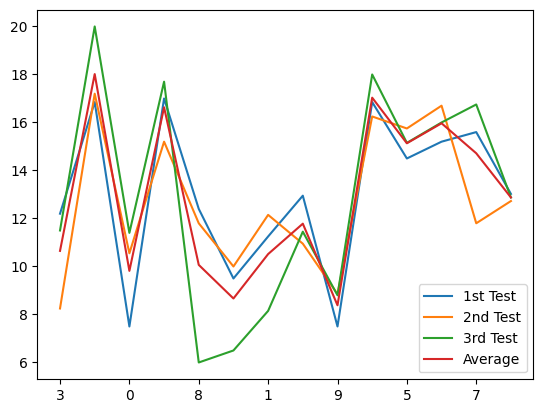

In [ ]:
grades.plot()

will produce a list of line plots, one for each column. On the x axis we have index values, and on the y axis column data. With this plot it's very easy to see that students had a very consistent performance across the three tests  (students 1 and 8 appear to have had special trouble with the 3rd test).

In [ ]:
grades.index

Index([3, 4, 0, 12, 8, 10, 1, 2, 9, 6, 5, 11, 7, 'Test Averages'], dtype='object')

In [ ]:
grades['Name']

3                    Arya
4                    Bran
0                 Brienne
12                  Bronn
8                  Cersei
10               Daenerys
1                   Jaime
2                     Jon
9                   Jorah
6                     Sam
5                   Sansa
11                 Tyrion
7                   Varys
Test Averages         NaN
Name: Name, dtype: object

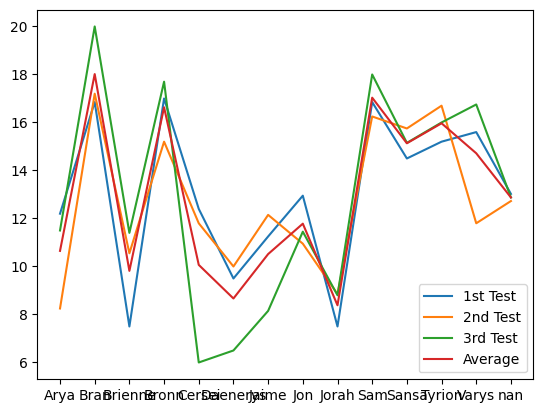

In [ ]:
ax = grades.plot(use_index = False)
ax.set_xticks(ticks = range(14), labels = grades['Name'])

Dataframes also have a convenient "hist" method for producing histograms:

array([[<Axes: title={'center': '1st Test'}>,
        <Axes: title={'center': '2nd Test'}>],
       [<Axes: title={'center': '3rd Test'}>,
        <Axes: title={'center': 'Average'}>]], dtype=object)

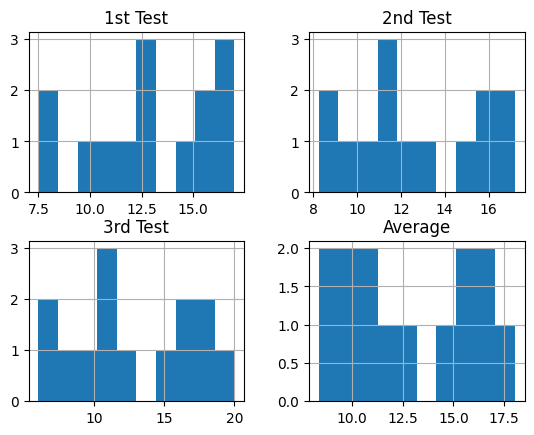

In [ ]:
grades.hist()

The plot method has several sub-methods for specific plot styles. Let's suppose we wanto to plot 1st test grades against averages:

<Axes: xlabel='1st Test', ylabel='Average'>

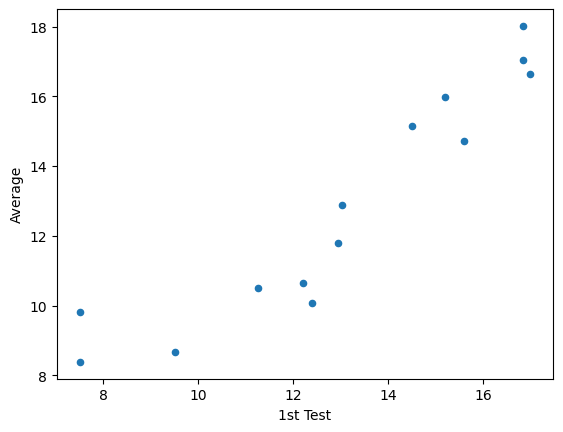

In [ ]:
grades.plot.scatter(x='1st Test',y='Average')

The "plot" method accepts a variety of parameters that can be passed onto the underlying matplotlib routines, like "kind", style" and "mfc" (marker face color):

<Axes: >

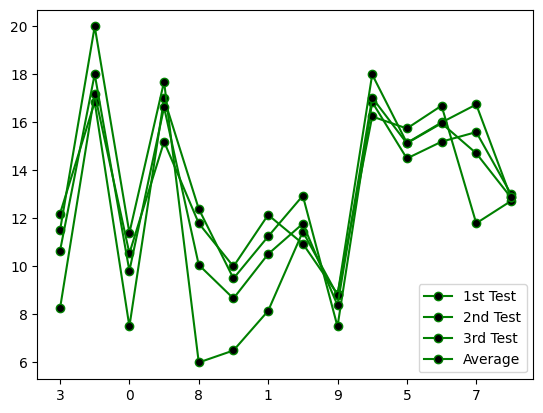

In [ ]:
grades.plot(kind="line", style='go-',mfc='black')

#### Exporting your dataframe to the Google Drive



Now that we haver prepared our "grades" dataframe with all the computations and columns, we may want to save it to a file, in a number of formats.

Here we will see how to save to  a folder  in your google drive, in the Excel format.

First, we need to *mount* our Google Drive on the VM file system. As explained in the "reading and writing files" notebook, we will use the google colab api with
the authentication token mecanism:

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/gdrive')


Now that our Google drive is mounted at mountpoint "/gdrive", let's export  our data frame to an Excel "xlsx" file using the dataframe method "`to_excel`" :

In [ ]:
grades.to_excel("/gdrive/My Drive/grades_colab.xlsx")

Let's check that the file is there:

In [ ]:
%ls /gdrive/My\ Drive

Now go to your Google Drive and try to open the "grades_colab.xlsx" file with Google Spreadsheets.